In [1]:
import numpy as np
import pandas as pd
import random

## Data import

In [3]:
!pip install ucimlrepo

In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
banknote_authentication = fetch_ucirepo(id=267) 
  
# data (as pandas dataframes) 
x = banknote_authentication.data.features 
y = banknote_authentication.data.targets 

In [5]:
# metadata 
banknote_authentication.metadata

{'uci_id': 267,
 'name': 'Banknote Authentication',
 'repository_url': 'https://archive.ics.uci.edu/dataset/267/banknote+authentication',
 'data_url': 'https://archive.ics.uci.edu/static/public/267/data.csv',
 'abstract': 'Data were extracted from images that were taken for the evaluation of an authentication procedure for banknotes.',
 'area': 'Computer Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 1372,
 'num_features': 4,
 'feature_types': ['Real'],
 'demographics': [],
 'target_col': ['class'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 2012,
 'last_updated': 'Fri Feb 16 2024',
 'dataset_doi': '10.24432/C55P57',
 'creators': ['Volker Lohweg'],
 'intro_paper': None,
 'additional_info': {'summary': 'Data were extracted from images that were taken from genuine and forged banknote-like specimens.  For digitization, an industrial camera usually used for print inspection w

In [6]:
# variable information 
banknote_authentication.variables

,name,role,type,demographic,description,units,missing_values
0,variance,Feature,Continuous,None,variance of Wavelet Transformed image,None,no
1,skewness,Feature,Continuous,None,skewness of Wavelet Transformed image,None,no
2,curtosis,Feature,Continuous,None,curtosis of Wavelet Transformed image,None,no
3,entropy,Feature,Continuous,None,entropy of image,None,no
4,class,Target,Integer,None,None,None,no


## Data exploration

In [8]:
df = pd.concat([x, y], axis=1)
df.head(10)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


In [9]:
df.tail(10)

,variance,skewness,curtosis,entropy,class
1362,-2.16680,1.59330,0.045122,-1.67800,1
1363,-1.16670,-1.42370,2.924100,0.66119,1
1364,-2.83910,-6.63000,10.484900,-0.42113,1
1365,-4.50460,-5.81260,10.886700,-0.52846,1
1366,-2.41000,3.74330,-0.402150,-1.29530,1
1367,0.40614,1.34920,-1.450100,-0.55949,1
1368,-1.38870,-4.87730,6.477400,0.34179,1
1369,-3.75030,-13.45860,17.593200,-2.77710,1
1370,-3.56370,-8.38270,12.393000,-1.28230,1
1371,-2.54190,-0.65804,2.684200,1.19520,1


**note: data is sorted by class**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [12]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [13]:
# Check for missing values
df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [14]:
df["class"].value_counts()

class
0    762
1    610
Name: count, dtype: int64

**note: data is nearly balanced**

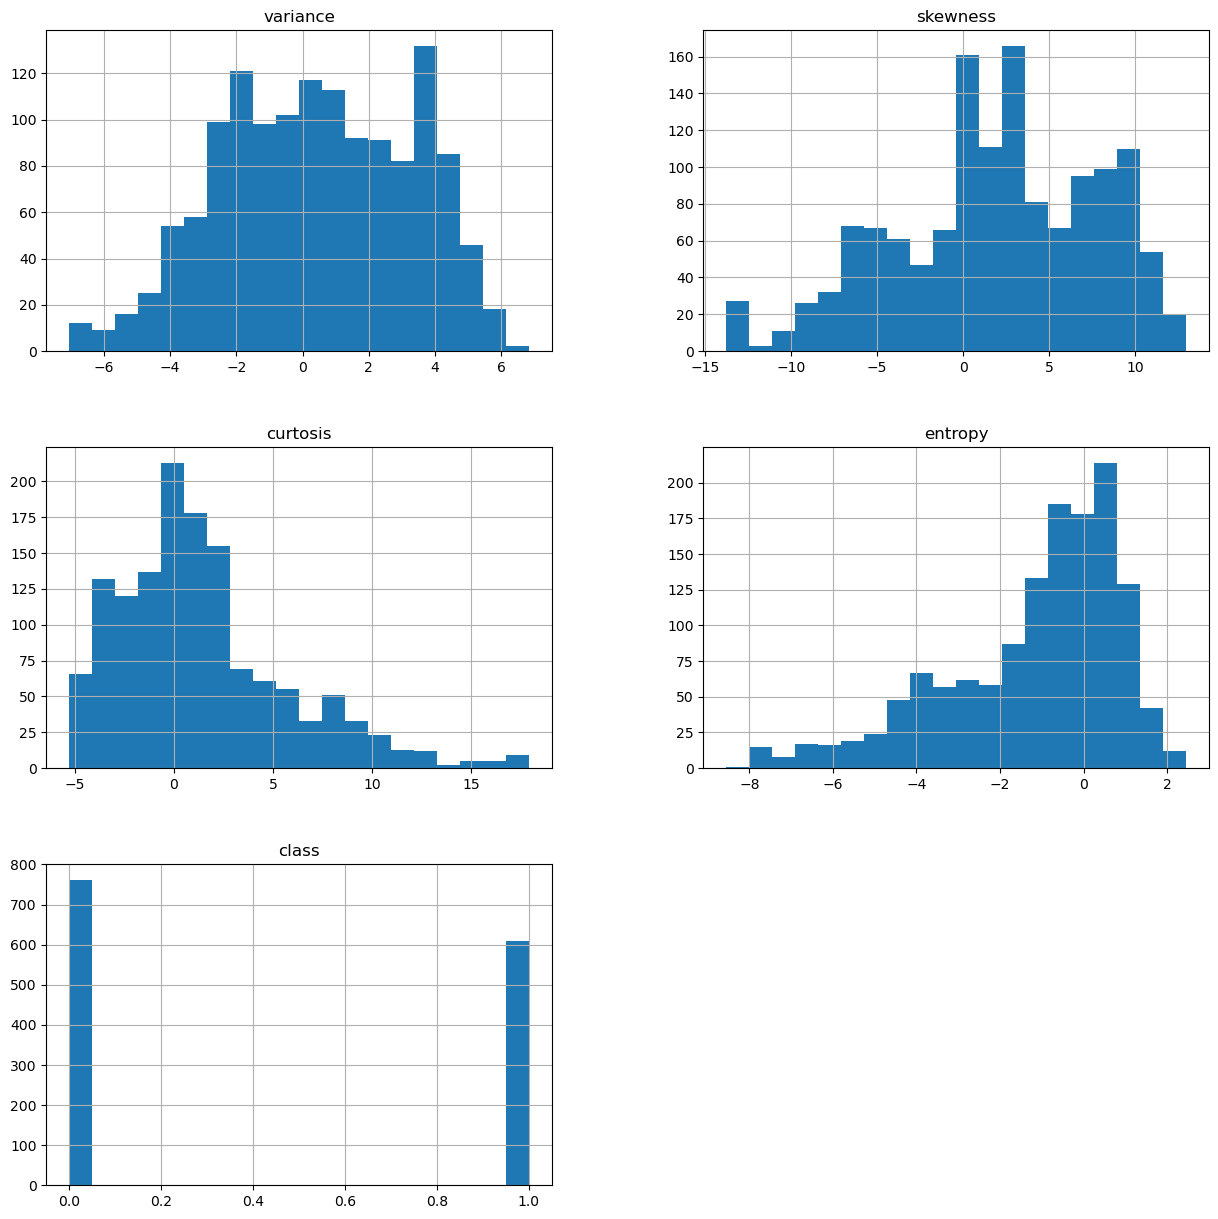

In [16]:
from matplotlib import pyplot as plt
df.hist(bins=20, figsize=(15, 15))
plt.show()

<Axes: >

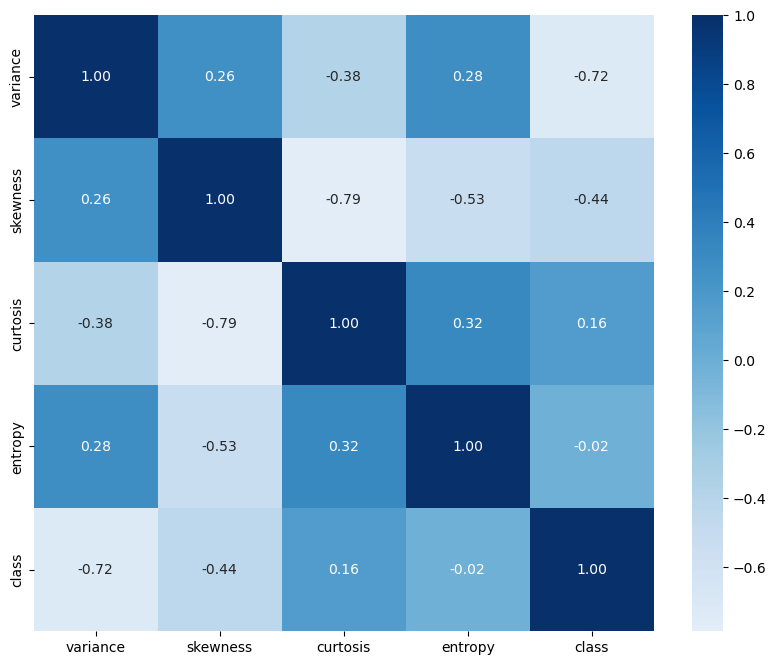

In [17]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="Blues", center=0)

**note: variance is the most correlated feature with class**

## Data preprocessing

In [20]:
# Convert labels from {0,1} to {-1, +1} for SVM
y = np.where(y == 0, -1, 1)
y = y.reshape(-1)          # OR

In [21]:
#normalize features:
x= (x - np.mean(x, axis=0)) / np.std(x, axis=0)
x = x.to_numpy()


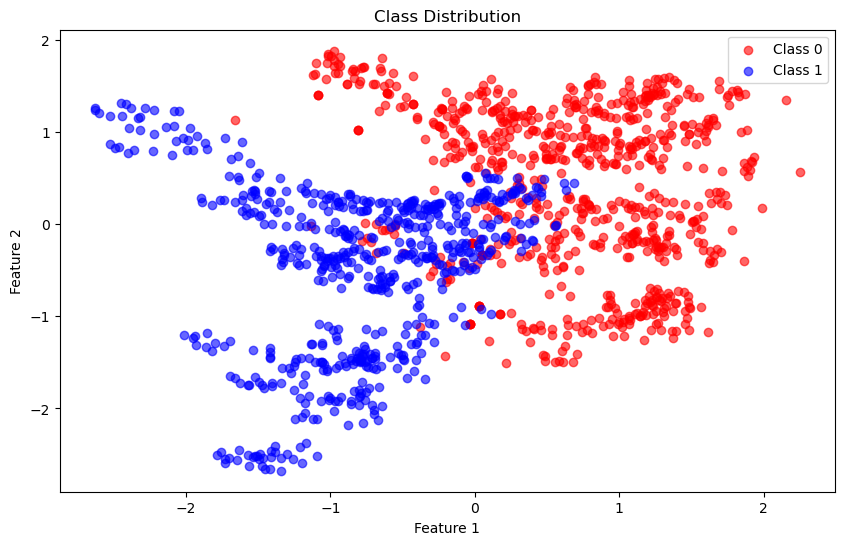

In [22]:
plt.figure(figsize=(10, 6))

# Plot points for each class
plt.scatter(x[:, 0][y == -1], x[:, 1][y == -1], color='red', label='Class 0', alpha=0.6)
plt.scatter(x[:, 0][y == 1], x[:, 1][y == 1], color='blue', label='Class 1', alpha=0.6)

# Add labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Class Distribution')
plt.legend()
plt.show()

In [23]:
x

array([[ 1.12180565,  1.14945512, -0.97597007,  0.35456135],
       [ 1.44706568,  1.06445293, -0.89503626, -0.12876744],
       [ 1.20780971, -0.77735215,  0.12221838,  0.61807317],
       ...,
       [-1.47235682, -2.62164576,  3.75901744, -0.75488418],
       [-1.40669251, -1.75647104,  2.552043  , -0.04315848],
       [-1.04712236, -0.43982168,  0.29861555,  1.1364645 ]])

In [24]:
y

array([-1, -1, -1, ...,  1,  1,  1])

## Train, test, validation split 

In [26]:
def train_test_val_split(x,y, test_ratio, val_ratio, random_seed):
    """
    Function to split the dataset into training, testing, and validation sets,
    first shuffling the data indices, then splitting it according to the specified
    test and validation ratios.
    """
    np.random.seed(random_seed)
    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)

    x = x[indices]
    y = y[indices]

    n_total = len(x)
    n_test = int(test_ratio* n_total)
    n_val = int(val_ratio* n_total)
    n_train = n_total - n_test - n_val
    x_train = x[:n_train]
    y_train = y[:n_train]

    x_val = x[n_train:n_train + n_val]
    y_val = y[n_train:n_train + n_val]

    x_test = x[n_train + n_val:]
    y_test = y[n_train + n_val:]

    return x_train, y_train, x_val, y_val, x_test, y_test




In [27]:
x_train, y_train, x_val, y_val, x_test, y_test = train_test_val_split(x,y, test_ratio=0.2, val_ratio=0.2, random_seed=42)

In [28]:
print("train data size:", len(x_train))
print("validation data size:", len(x_val))
print("test data size:", len(x_test))

train data size: 824
validation data size: 274
test data size: 274


## SVM (support vector machine) model from scratch 

In [30]:
class KernelSVMFromScratch:
    def __init__(self, lambda_param=0.01, learning_rate=0.01, max_iter=1000, optimizer='subgradient', delta=1.0, kernel='linear', degree=3, gamma=1.0):
        """
        Initialize the Kernel SVM model with the specified parameters.
        """
        self.lambda_param = lambda_param
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.optimizer = optimizer
        self.delta = delta
        self.kernel = kernel
        self.degree = degree  # For polynomial kernel
        self.gamma = gamma    # For RBF kernel
        self.alpha = None     # Lagrange multipliers
        self.b = 0            # Bias
        self.support_vectors = None
        self.support_labels = None

    def _kernel_function(self, x1, x2):
        """
        Compute the kernel between two samples.
        """
        if self.kernel == 'linear':
            return np.dot(x1, x2)
        elif self.kernel == 'polynomial':
            return (np.dot(x1, x2) + 1) ** self.degree
        elif self.kernel == 'rbf':
            return np.exp(-self.gamma * np.linalg.norm(x1 - x2) ** 2)
        else:
            raise ValueError("Unsupported kernel type")

    def _compute_kernel_matrix(self, X):
        """
        Compute the kernel matrix for the dataset.
        """
        n_samples = X.shape[0]
        kernel_matrix = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                kernel_matrix[i, j] = self._kernel_function(X[i], X[j])
        return kernel_matrix

    def fit(self, X_train, y_train):
        """
        Train the Kernel SVM model using gradient or subgradient descent.
        """
        n_samples = X_train.shape[0]
        self.alpha = np.zeros(n_samples)
        kernel_matrix = self._compute_kernel_matrix(X_train)

        for epoch in range(self.max_iter):
            for i in range(n_samples):
                margin = y_train[i] * (np.sum(self.alpha * y_train * kernel_matrix[i]) + self.b)

                # Subgradient descent
                if self.optimizer == 'subgradient':
                    if margin >= 1:
                        d_alpha = 0
                        d_b = 0
                    else:
                        d_alpha = -y_train[i]
                        d_b = -y_train[i]

                # Gradient descent with smooth hinge loss
                elif self.optimizer == 'gradient':
                    if margin >= self.delta:
                        d_alpha = 0
                        d_b = 0
                    elif 0 < margin < self.delta:
                        d_alpha = -y_train[i] * (self.delta - margin) / self.delta
                        d_b = -y_train[i] * (self.delta - margin) / self.delta
                    else:
                        d_alpha = -y_train[i]
                        d_b = -y_train[i]

                # Update alpha and bias
                self.alpha[i] -= self.learning_rate * d_alpha
                self.b -= self.learning_rate * d_b

        # Store support vectors
        self.support_vectors = X_train[self.alpha > 1e-5]
        self.support_labels = y_train[self.alpha > 1e-5]
        self.alpha = self.alpha[self.alpha > 1e-5]

    def predict(self, X):
        """
        Predict the labels for the given data using the trained model.
        """
        y_pred = []
        for x in X:
            decision = np.sum(self.alpha * self.support_labels * np.array([self._kernel_function(x, sv) for sv in self.support_vectors])) + self.b
            y_pred.append(np.sign(decision))
        return np.array(y_pred)

    def score(self, X, y):
        """
        Compute the accuracy of the model on the given data.
        """
        preds = self.predict(X)
        return np.mean(preds == y)

In [33]:
def evaluate_svm(X_train, y_train, X_val, y_val, config=None):
    """
    Helper function to evaluate the SVM model with given hyperparameters.
    Includes a default configuration for quick testing.
    """
    if config is None:
        config = {
            'lambda_param': 0.01,
            'learning_rate': 0.01,
            'max_iter': 100,
            'optimizer': 'subgradient',
            'delta': 1.0,
            'kernel': 'linear',
            'degree': 3,
            'gamma': 1.0
        }

    # Initialize and train the SVM
    svm = KernelSVMFromScratch(
        lambda_param=config['lambda_param'],
        learning_rate=config['learning_rate'],
        max_iter=config['max_iter'],
        optimizer=config['optimizer'],
        delta=config.get('delta', 1.0),
        kernel=config['kernel'],
        degree=config.get('degree', 3),
        gamma=config.get('gamma', 1.0)
    )
    svm.fit(X_train, y_train)
    score = svm.score(X_val, y_val)
    print(f"optimizer: {config['optimizer']}, λ: {config['lambda_param']}, "
          f"learning_rate: {config['learning_rate']}, max_iter: {config['max_iter']}, "
          f"delta: {config.get('delta', 1.0)}, kernel: {config['kernel']}, "
          f"degree: {config.get('degree', 3)}, gamma: {config.get('gamma', 1.0)}, "
          f"score (Accuracy): {score}")
    return score


In [35]:
def find_best_hyperparameters(X_train, y_train, X_val, y_val, optimizer='subgradient', n_iter=30):
    """
    Perform random search to find the best hyperparameters for the SVM model.
    Includes kernel-specific parameters for kernelized SVM.
    """
    # Define hyperparameter options
    lambda_candidates = [0.001, 0.01, 0.1]
    learning_rates = [0.001, 0.01, 0.1]
    max_iters = [500, 1000]
    delta_candidates = [0.5, 1.0, 1.5] if optimizer == 'gradient' else [None]
    kernels = ['linear', 'polynomial', 'rbf']
    degrees = [2, 3, 4]
    gammas = [0.1, 1, 10]

    best_score = -np.inf
    best_config = {}

    for _ in range(n_iter):
        kernel = random.choice(kernels)
        lam = random.choice(lambda_candidates)
        lr = random.choice(learning_rates)
        max_iter = random.choice(max_iters)
        delta = random.choice(delta_candidates)

        config = {
            'lambda_param': lam,
            'learning_rate': lr,
            'max_iter': max_iter,
            'optimizer': optimizer,
            'delta': delta if delta is not None else 1.0,
            'kernel': kernel
        }

        if kernel == 'polynomial':
            config['degree'] = random.choice(degrees)
        elif kernel == 'rbf':
            config['gamma'] = random.choice(gammas)

        score = evaluate_svm(X_train, y_train, X_val, y_val, config)
        if score > best_score:
            best_score = score
            best_config = config

    return best_config, best_score


In [54]:
#run Random Search for Subgradient Descent
best_config_subgrad, best_val_score_subgrad = find_best_hyperparameters(x_train, y_train, x_val, y_val, optimizer='subgradient', n_iter=3)

optimizer: subgradient, λ: 0.1, learning_rate: 0.001, max_iter: 500, delta: 1.0, kernel: polynomial, degree: 2, gamma: 1.0, score (Accuracy): 0.5547445255474452
optimizer: subgradient, λ: 0.1, learning_rate: 0.1, max_iter: 500, delta: 1.0, kernel: polynomial, degree: 3, gamma: 1.0, score (Accuracy): 0.718978102189781
optimizer: subgradient, λ: 0.1, learning_rate: 0.01, max_iter: 500, delta: 1.0, kernel: polynomial, degree: 2, gamma: 1.0, score (Accuracy): 0.5547445255474452


In [55]:
#run Random Search for Gradient Descent (Smooth Hinge)
best_config_grad, best_val_score_grad = find_best_hyperparameters(x_train, y_train, x_val, y_val, optimizer='gradient', n_iter=3)

optimizer: gradient, λ: 0.001, learning_rate: 0.1, max_iter: 500, delta: 0.5, kernel: rbf, degree: 3, gamma: 1, score (Accuracy): 0.5547445255474452
optimizer: gradient, λ: 0.01, learning_rate: 0.001, max_iter: 1000, delta: 1.0, kernel: polynomial, degree: 2, gamma: 1.0, score (Accuracy): 0.5547445255474452
optimizer: gradient, λ: 0.1, learning_rate: 0.001, max_iter: 500, delta: 0.5, kernel: rbf, degree: 3, gamma: 1, score (Accuracy): 0.5547445255474452


In [56]:
#pick the best optimizer and config
if best_val_score_subgrad > best_val_score_grad:
    best_config = best_config_subgrad
    best_optimizer = 'Subgradient Descent'
else:
    best_config = best_config_grad
    best_optimizer = 'Gradient Descent (Smoothed Hinge)'


In [60]:
#training the final model with best hyperparameters
final_svm = KernelSVMFromScratch(**best_config)
final_svm.fit(x_train, y_train)
test_accuracy = final_svm.score(x_test, y_test)

In [61]:
print(f"Best Hyperparameters: {best_config}")
print(f"Best Validation Score: {best_val_score_subgrad if best_optimizer == 'Subgradient Descent' else best_val_score_grad:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Best Hyperparameters: {'lambda_param': 0.1, 'learning_rate': 0.1, 'max_iter': 500, 'optimizer': 'subgradient', 'delta': 1.0, 'kernel': 'polynomial', 'degree': 3}
Best Validation Score: 0.7190
Test Accuracy: 0.6569


In [62]:
# Print best hyperparameters for both methods
print("\nBest Hyperparameters for Subgradient Descent:")
print(f"  Lambda: {best_config_subgrad['lambda_param']}")
print(f"  Learning Rate: {best_config_subgrad['learning_rate']}")
print(f"  Max Iterations: {best_config_subgrad['max_iter']}")
print(f"  Kernel: {best_config_subgrad['kernel']}")
print(f"  Degree: {best_config_subgrad['degree']}")
print(f"  Validation Score: {best_val_score_subgrad:.4f}")


Best Hyperparameters for Subgradient Descent:
  Lambda: 0.1
  Learning Rate: 0.1
  Max Iterations: 500
  Kernel: polynomial
  Degree: 3
  Validation Score: 0.7190


In [64]:
print("\nBest Hyperparameters for Gradient Descent (Smoothed Hinge):")
print(f"  Lambda: {best_config_grad['lambda_param']}")
print(f"  Learning Rate: {best_config_grad['learning_rate']}")
print(f"  Max Iterations: {best_config_grad['max_iter']}")
print(f"  Delta: {best_config_grad['delta']}")
print(f"  Kernel: {best_config_grad['kernel']}")

# Only print degree if it's a polynomial kernel
if best_config_grad['kernel'] == 'polynomial':
    print(f"  Degree: {best_config_grad.get('degree', 'N/A')}")

# Only print gamma if it's an RBF kernel
if best_config_grad['kernel'] == 'rbf':
    print(f"  Gamma: {best_config_grad.get('gamma', 'N/A')}")

print(f"  Validation Score: {best_val_score_grad:.4f}")



Best Hyperparameters for Gradient Descent (Smoothed Hinge):
  Lambda: 0.001
  Learning Rate: 0.1
  Max Iterations: 500
  Delta: 0.5
  Kernel: rbf
  Gamma: 1
  Validation Score: 0.5547


## Training on 500 epochs with subgradient 

In [ ]:
svm_subgradient = KernelSVMFromScratch(**best_config_subgrad)
# Train the model
train_losses_sub, train_accuracies_sub, val_accuracies_sub, val_losses_sub, test_accuracies_sub, test_losses_sub = svm_subgradient.fit(x_train, y_train, x_val, y_val, x_test, y_test)

# Print the epoch-wise info
for epoch in range(svm_subgradient.max_iter):
    train_loss_sub = train_losses_sub[epoch]
    val_loss_sub = val_losses_sub[epoch] if val_losses_sub is not None else "N/A"
    train_acc_sub = train_accuracies_sub[epoch]
    val_acc_sub = val_accuracies_sub[epoch] if val_accuracies_sub is not None else "N/A"
    
    print(f"Epoch {epoch+1} | Train Loss: {train_loss_sub:.4f} | Train Acc: {train_acc_sub:.4f} | "
          f"Val Acc: {val_acc_sub if val_acc_sub == 'N/A' else f'{val_acc_sub:.4f}'} | "
          f"Val Loss: {val_loss_sub if val_loss_sub == 'N/A' else f'{val_loss_sub:.4f}'}")

**after 500 epochs, train loss decrased from 0.71 to 0.03**

**also, validation loss decreased from 0.4 to 0.04**

**train accuarcy increased from 85% to 98%**

**validation accuarcy increased from 87% to 94%**


### Loss curve for train & validation with subgradient optimizer 

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(train_losses_sub, label='Training Loss', color='blue')
if val_accuracies_sub is not None:
    plt.plot(val_losses_sub, label='Validation Loss', color='orange')

plt.title('Loss Curve with subgradient descent')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Accuarcy curve for train & validation with subgradient optimizer 

In [ ]:
import matplotlib.pyplot as plt

# Plot the accuracy curve
plt.figure(figsize=(10, 6))
plt.plot(train_accuracies_sub, label='Training Accuracy', color='blue')
if val_accuracies_sub is not None:
    plt.plot(val_accuracies_sub, label='Validation Accuracy', color='orange')

plt.title('Accuracy Curve for subgradient')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Training 500 epoch with gradient decsent

In [ ]:
svm_gradient = SVMFromScratch(**best_config_grad)

# Train the model
train_losses_grad, train_accuracies_grad, val_accuracies_grad, val_losses_grad,test_accuracies_grad, test_losses_grad= svm_gradient.fit(x_train, y_train, x_val, y_val, x_test, y_test) 

# Print the epoch-wise info
for epoch in range(svm_gradient.max_iter):
    train_loss_grad = train_losses_grad[epoch]
    val_loss_grad =val_losses_grad[epoch]
    train_acc_grad = train_accuracies_grad[epoch]
    val_acc_grad = val_accuracies_grad[epoch] if val_accuracies_grad is not None else "N/A"
    
    print(f"Epoch {epoch+1} | train_Loss: {train_loss_grad:.4f} | Train Acc: {train_acc_grad:.4f} | Val Acc: {val_acc_grad if val_acc_grad == 'N/A' else f'{val_acc_grad:.4f}'} | val loss: {val_loss_grad if val_acc_grad == 'N/A' else f'{val_loss_grad:.4f}'}")



**notice here the loss in both train and validation in gradient method is more than that in subgradient method, accuracy in gradient is slightly greater than that it subgradient**

### Loss curve for train & validation with gradient optimizer 

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(train_losses_grad, label='Training Loss', color='blue')
if val_accuracies_grad is not None:
    plt.plot(val_losses_grad, label='Validation Loss', color='orange')

plt.title('Loss Curve with gradient descent')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Plot the accuracy curve
plt.figure(figsize=(10, 6))
plt.plot(train_accuracies_grad, label='Training Accuracy', color='blue')
if val_accuracies_grad is not None:
    plt.plot(val_accuracies_grad, label='Validation Accuracy', color='orange')

plt.title('Accuracy Curve for gradient')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## model testing with subgradient

In [ ]:
svm_subgradient = SVMFromScratch(**best_config_subgrad)

# Train the model
train_losses_sub, train_accuracies_sub, val_accuracies_sub, val_losses_sub,test_accuracies_sub, test_losses_sub= svm_subgradient.fit(x_train, y_train, x_val, y_val, x_test, y_test) 

# Print the epoch-wise info
for epoch in range(svm_subgradient.max_iter):
    test_loss_sub = test_losses_sub[epoch]
    test_acc_sub = test_accuracies_sub[epoch]
    
    print(f"Epoch {epoch+1} | test_Loss: {test_loss_sub:.4f} | Test Acc: {test_acc_sub:.4f} ")



**with subgradient, test loss decreased to 0.02**

## Model testing with gradient

In [ ]:
svm_gradient = SVMFromScratch(**best_config_grad)

# Train the model
train_losses_grad, train_accuracies_grad, val_accuracies_grad, val_losses_grad,test_accuracies_grad, test_losses_grad= svm_gradient.fit(x_train, y_train, x_val, y_val, x_test, y_test) 

# Print the epoch-wise info
for epoch in range(svm_gradient.max_iter):
    test_acc_grad = test_accuracies_grad[epoch]
    test_loss_grad = test_losses_grad[epoch]

    
    print(f"Epoch {epoch+1} | test_Loss: {test_loss_grad:.4f} | Test Acc: {test_acc_grad:.4f} ")



**test loss increases when using gradient descent as an optimizer**

## loss comparasion between train & test and validation while using subgradient and gradient

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot the loss curve for Subgradient
ax1.plot(train_losses_sub, label='Training Loss (Subgradient)', color='blue')
ax1.plot(val_losses_sub, label='Validation Loss (Subgradient)', color='orange')
ax1.plot(test_losses_sub, label='Test Loss (Subgradient)', color='green')
ax1.set_title('Loss Curve with Subgradient Descent')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot the loss curve for Gradient
ax2.plot(train_losses_grad, label='Training Loss (Gradient)', color='blue', linestyle='--')
ax2.plot(val_losses_grad, label='Validation Loss (Gradient)', color='orange', linestyle='--')
ax2.plot(test_losses_grad, label='Test Loss (Gradient)', color='green', linestyle='--')
ax2.set_title('Loss Curve with Gradient Descent')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

# Show the figure
plt.tight_layout()
plt.show()

## loss comparasion between train & test and validation while using subgradient and gradient

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot the accuracy curves for Gradient Descent
ax1.plot(train_accuracies_grad, label='Training Accuracy (Gradient)', color='blue', linestyle='-')
ax1.plot(val_accuracies_grad, label='Validation Accuracy (Gradient)', color='orange', linestyle='-')
ax1.plot(test_accuracies_grad, label='Test Accuracy (Gradient)', color='green', linestyle='-')
ax1.set_title('Accuracy Curves for Gradient Descent')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot the accuracy curves for Subgradient Descent
ax2.plot(train_accuracies_sub, label='Training Accuracy (Subgradient)', color='blue', linestyle='--')
ax2.plot(val_accuracies_sub, label='Validation Accuracy (Subgradient)', color='orange', linestyle='--')
ax2.plot(test_accuracies_sub, label='Test Accuracy (Subgradient)', color='green', linestyle='--')
ax2.set_title('Accuracy Curves for Subgradient Descent')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Adjust layout and show the figure
plt.tight_layout()
plt.show()


## Confusion matrix 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
unique_labels = np.unique(y_test)
cm = np.zeros((len(unique_labels), len(unique_labels)), dtype=int)

for true, pred in zip(y_test, svm_subgradient.predict(x_test)):
    cm[int(true == 1), int(pred == 1)] += 1

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Initialize confusion matrix values
true_positive = sum((y_test == 1) & (svm_subgradient.predict(x_test) == 1))
false_positive = sum((y_test == -1) & (svm_subgradient.predict(x_test) == 1))
false_negative = sum((y_test == 1) & (svm_subgradient.predict(x_test) == -1))

# Calculate precision and recall
precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

In [ ]:
# Extract weights and bias for gradient optimizer
w_grad = svm_gradient.w
b_grad = svm_gradient.b

# Extract weights and bias for the unoptimized model (assuming initial weights and bias are zeros)
w_unoptimized = np.zeros_like(w_grad)
b_unoptimized = 0

# Plot the data points
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0][y == -1], x[:, 1][y == -1], color='purple', label='Class 0', alpha=0.6)
plt.scatter(x[:, 0][y == 1], x[:, 1][y == 1], color='blue', label='Class 1', alpha=0.6)

# Define weights and bias for subgradient optimizer
w = svm_subgradient.w
b = svm_subgradient.b

# Define x1 range for plotting
x1 = np.linspace(x[:, 0].min(), x[:, 0].max(), 100)

# Plot the decision boundary for subgradient optimizer
x2_sub = -(w[0] * x1 + b) / w[1]
plt.plot(x1, x2_sub, color='red', label='Subgradient Decision Boundary')

# Plot the decision boundary for gradient optimizer
x2_grad = -(w_grad[0] * x1 + b_grad) / w_grad[1]
plt.plot(x1, x2_grad, color='green', label='Gradient Decision Boundary')

# Plot the decision boundary for unoptimized model
x2_unoptimized = -(w_unoptimized[0] * x1 + b_unoptimized) / (w_unoptimized[1] + 1e-10)  # Avoid division by zero
plt.plot(x1, x2_unoptimized, color='orange', label='Unoptimized Decision Boundary', linestyle='--')

# Add labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundaries for Different Optimizers')
plt.legend()
plt.show()

# Comparative Analysis


In [ ]:
from IPython.display import Markdown, display
import matplotlib.pyplot as plt

def find_convergence_epoch(losses, threshold=1e-4, patience=5):
    """
    Detects convergence: if the loss change over 'patience' epochs is below 'threshold'.
    """
    for i in range(len(losses) - patience):
        window = losses[i:i+patience]
        if max(window) - min(window) < threshold:
            return i + patience
    return len(losses)

def plot_loss_with_convergence(train_losses_grad, train_losses_sub, epoch_gd, epoch_sub):
    plt.figure(figsize=(10, 6))
    
    # Plot the loss curves
    plt.plot(train_losses_grad, label='Gradient Descent Loss', color='blue')
    plt.plot(train_losses_sub, label='Subgradient Descent Loss', color='green')
    
    # Plot vertical lines for convergence
    plt.axvline(x=epoch_gd, color='red', linestyle='--', label=f'GD Converged @ {epoch_gd}')
    plt.axvline(x=epoch_sub, color='orange', linestyle='--', label=f'SubGD Converged @ {epoch_sub}')
    
    # Labels and title
    plt.title('Loss per Epoch with Convergence Points')
    plt.xlabel('Epoch')
    plt.ylabel('Hinge Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def display_results():
    # Accuracy Comparison
    display(Markdown("## Accuracy Comparison"))
    sub_train_acc, sub_val_acc = train_accuracies_sub[-1] * 100, val_accuracies_sub[-1] * 100
    grad_train_acc, grad_val_acc = train_accuracies_grad[-1] * 100, val_accuracies_grad[-1] * 100

    display(Markdown(f"Subgradient Descent: **{sub_train_acc:.2f}%** train, **{sub_val_acc:.2f}%** validation accuracy."))
    display(Markdown(f"Gradient Descent: **{grad_train_acc:.2f}%** train, **{grad_val_acc:.2f}%** validation accuracy."))
    display(Markdown("**Conclusion:** " + 
                     ("Subgradient Descent generalizes better." if sub_val_acc > grad_val_acc else "Gradient Descent generalizes better.")))

    # Convergence Speed
    display(Markdown("## Convergence Speed"))
    epoch_gd = find_convergence_epoch(train_losses_grad)
    epoch_sub = find_convergence_epoch(train_losses_sub)

    display(Markdown(f"Gradient Descent converged at epoch: **{epoch_gd}**."))
    display(Markdown(f"Subgradient Descent converged at epoch: **{epoch_sub}**."))

    if epoch_gd < epoch_sub:
        display(Markdown("**Conclusion:** Gradient Descent converged faster than Subgradient Descent."))
    else:
        display(Markdown("**Conclusion:** Subgradient Descent converged faster than Gradient Descent."))

    # Plot Loss Curves with Convergence Points
    plot_loss_with_convergence(train_losses_grad, train_losses_sub, epoch_gd, epoch_sub)

    # Stability of the Loss Function
    display(Markdown("## Stability of the Loss Function"))
    sub_loss_std, grad_loss_std = np.std(train_losses_sub), np.std(train_losses_grad)

    display(Markdown(f"Subgradient Descent loss variance: **{sub_loss_std:.4f}**."))
    display(Markdown(f"Gradient Descent loss variance: **{grad_loss_std:.4f}**."))
    display(Markdown("**Conclusion:** " + 
                     ("Subgradient Descent is more stable." if sub_loss_std < grad_loss_std else "Gradient Descent is more stable.")))

    # Plot Loss Curves
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses_sub, label='Subgradient Loss', color='blue')
    plt.plot(train_losses_grad, label='Gradient Loss', color='orange')
    plt.title('Loss Function Stability')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Generalization on Test Data
    display(Markdown("## Generalization on Test Data"))
    sub_test_acc, grad_test_acc = test_accuracies_sub[-1] * 100, test_accuracies_grad[-1] * 100

    display(Markdown(f"Subgradient Descent test accuracy: **{sub_test_acc:.2f}%**."))
    display(Markdown(f"Gradient Descent test accuracy: **{grad_test_acc:.2f}%**."))
    display(Markdown("**Conclusion:** " + 
                     ("Subgradient Descent generalizes better." if sub_test_acc > grad_test_acc else 
                      "Gradient Descent generalizes better." if sub_test_acc < grad_test_acc else 
                      "Both methods generalize equally well.")))

    # Confusion Matrices
    def plot_confusion_matrix(model, title):
        cm = np.zeros((2, 2), dtype=int)
        for true, pred in zip(y_test, model.predict(x_test)):
            cm[int(true == 1), int(pred == 1)] += 1
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["-1", "1"], yticklabels=["-1", "1"])
        plt.title(title)
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.show()

    display(Markdown("### Confusion Matrix for Subgradient Descent"))
    plot_confusion_matrix(svm_subgradient, "Subgradient Descent")

    display(Markdown("### Confusion Matrix for Gradient Descent"))
    plot_confusion_matrix(svm_gradient, "Gradient Descent")

# Call the function to display results
display_results()